In [ ]:
import os
from PIL import Image
import numpy as np
i=0

imgs = []
for file in os.listdir('processed images/'):
    img = Image.open('processed images/'+file)
    img_grey = img.convert("L")
    img_grey = img_grey.resize((64,64))
    imgs.append(np.array(img_grey))
    img_grey.save('gray/'+str(i)+'.jpg')
    i+=1

In [29]:
data = np.array(imgs)
data = np.expand_dims(data,axis=3)
data.shape

(240, 64, 64, 1)

In [31]:
import pandas as pd
target = pd.read_csv('target.csv')
target = target['Ra']
target.head(15)

0     1.446
1     2.051
2     2.598
3     3.087
4     2.273
5     2.989
6     2.168
7     2.637
8     2.413
9     1.748
10    1.709
11    1.416
12    1.524
13    2.207
14    1.846
Name: Ra, dtype: float64

In [33]:
data = data.copy()
target = target.copy()

wear :  2.989


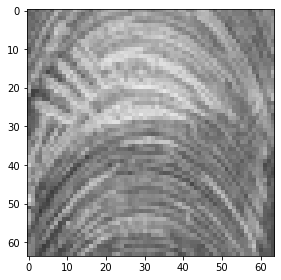

In [34]:
from skimage.io import imshow
imshow(data[5]);
print("wear : ",target[5])

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import sum,square,mean,epsilon

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

def r2_score(y_true,y_pred):
    u = sum(square(y_true-y_pred))
    v = sum(square(y_true-mean(y_true)))
    return (1-u/(v+epsilon()))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_score])

# Train the model
model.fit(data, target, epochs=10, batch_size=32)

Epoch 1/10
8/8 [==============================] - 21s 214ms/step - loss: 11346.1914 - r2_score: -34898.7305
Epoch 2/10
8/8 [==============================] - 1s 139ms/step - loss: 2.0593 - r2_score: -2.5762
Epoch 3/10
8/8 [==============================] - 1s 134ms/step - loss: 1.4826 - r2_score: -1.4531
Epoch 4/10
8/8 [==============================] - 1s 134ms/step - loss: 0.9505 - r2_score: -0.4631
Epoch 5/10
8/8 [==============================] - 1s 132ms/step - loss: 0.8402 - r2_score: -0.3019
Epoch 6/10
8/8 [==============================] - 1s 136ms/step - loss: 0.8711 - r2_score: -0.2973
Epoch 7/10
8/8 [==============================] - 1s 134ms/step - loss: 1.0613 - r2_score: -0.6274
Epoch 8/10
8/8 [==============================] - 1s 147ms/step - loss: 0.8746 - r2_score: -0.3890
Epoch 9/10
8/8 [==============================] - 1s 150ms/step - loss: 0.8686 - r2_score: -0.5021
Epoch 10/10
8/8 [==============================] - 1s 150ms/step - loss: 0.8286 - r2_score: -0.2664


In [36]:
model.save('surface_model.h5')

In [37]:
img = Image.open('gray/238.jpg')
img_grey = img.convert("L")
img_grey = img_grey.resize((64,64))
imgs = np.array(img_grey)
data = np.reshape(imgs,(1,64,64,1))

In [ ]:
img_pred = model.predict(data)

In [39]:
img_pred[0][0]

NameError: name 'img_pred' is not defined